# ***💡Partie: Statistiques Descriptives¶ et Traitement de données***


# ***✅📊L'importation des bibliothèques nécessaires:***

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
#from sklearn.linear_model import LogisticRegressionl
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

##  ***➡ Charger les données:***

In [21]:
df=pd.read_csv('Bank_Personal_Loan.csv')

## ***➡ Exploration Initiale des Données:***

In [22]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1/60,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1/50,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1/00,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2/70,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1/00,2,0,0,0,0,0,1


###
# 📋 Détail des colonnes

Ce tableau présente les colonnes du modèle de données pour le prêt personnel avec leur description et objectif, en français et en arabe.

| **Colonne**             | **Description (Français)**                                                                                                                                   | **الوصف (Arabe)**                                                                                           | **Objectif (Français)**                                                                                                                                          | **الهدف (Arabe)**                                                                                               |
|-------------------------|------------------------------------------------------------------------------------------------------------------------------------------------------------|-------------------------------------------------------------------------------------------------------------|------------------------------------------------------------------------------------------------------------------------------------------------------------------|----------------------------------------------------------------------------------------------------------------|
| **ID**                  | Identifiant unique attribué à chaque client dans la base de données.                                                                                       | معرف فريد يُعطى لكل عميل في قاعدة البيانات.                                                                | Utilisé pour identifier chaque enregistrement de manière unique.                                                                                                   | يُستخدم لتمييز كل سجل بطريقة فريدة.                                                                             |
| **Age**                 | Âge du client.                                                                                                                                              | عمر العميل.                                                                                                  | Aider à déterminer la capacité de remboursement en fonction de l'âge du client.                                                                                    | يساعد في تحديد قدرة العميل على سداد القرض حسب عمره.                                                            |
| **Experience**          | Nombre d'années d'expérience professionnelle du client.                                                                                                   | عدد سنوات الخبرة العملية للعميل.                                                                             | Permet d'évaluer la stabilité professionnelle du client, ce qui influence sa capacité à rembourser.                                                             | يُستخدم لتقييم الاستقرار المهني للعميل الذي يؤثر على قدرته في سداد القرض.                                     |
| **Income**              | Revenu annuel ou mensuel du client.                                                                                                                         | الدخل السنوي أو الشهري للعميل.                                                                                | Un revenu plus élevé peut être un indicateur de la capacité du client à rembourser un prêt.                                                                      | يُعتبر الدخل العالي مؤشرًا على قدرة العميل في سداد القرض.                                                        |
| **ZIP Code**            | Code postal de la région où réside le client.                                                                                                              | الرمز البريدي للمنطقة التي يعيش فيها العميل.                                                                  | Permet d'analyser la situation économique de la région et son impact sur les finances du client.                                                                 | يساعد في تحليل الوضع الاقتصادي للمنطقة وتأثيره على مالية العميل.                                                |
| **Family**              | Nombre de personnes dans la famille du client.                                                                                                             | عدد أفراد أسرة العميل.                                                                                        | Permet d'évaluer les obligations financières du client, qui peuvent influencer sa capacité à rembourser le prêt.                                                  | يساعد في تقييم الالتزامات المالية للعميل التي قد تؤثر على قدرته على سداد القرض.                              |
| **CCAvg**               | Moyenne des dépenses mensuelles sur carte de crédit.                                                                                                      | متوسط الإنفاق الشهري باستخدام بطاقة الائتمان.                                                                  | Permet de comprendre le comportement de dépense du client et son utilisation du crédit.                                                                          | يساعد في فهم سلوك الإنفاق للعميل واستخدامه للائتمان.                                                             |
| **Education**           | Niveau d'éducation du client (ex : lycée, bachelor, master).                                                                                              | مستوى تعليم العميل (مثل: الثانوية، البكالوريوس، الماجستير).                                                  | Permet d'évaluer la stabilité financière et le potentiel de revenu en fonction du niveau d'éducation du client.                                                    | يساعد في تقييم الاستقرار المالي للعميل وإمكانية دخله بناءً على مستوى تعليمه.                                     |
| **Mortgage**            | Montant du prêt hypothécaire que possède le client.                                                                                                        | قيمة الرهن العقاري الذي يمتلكه العميل.                                                                         | Permet de comprendre les obligations financières existantes du client, influençant la capacité de rembourser un nouveau prêt.                                      | يساعد في فهم الالتزامات المالية الحالية للعميل التي تؤثر على قدرته في سداد قرض جديد.                         |
| **Personal Loan**       | Si le client possède un prêt personnel ou non.                                                                                                            | إذا كان العميل قد حصل على قرض شخصي أم لا.                                                                     | Permet de comprendre le comportement de crédit passé du client et son historique de remboursement.                                                              | يساعد في فهم سلوك العميل مع القروض الشخصية السابقة وسجل سدادها.                                                 |
| **Securities Account**  | Si le client possède un compte de titres (actions, obligations, etc.).                                                                                    | إذا كان العميل يمتلك حسابًا للأوراق المالية (أسهم، سندات، إلخ).                                                | Un compte de titres indique une certaine stabilité financière et peut influencer la décision de prêt.                                                            | حساب الأوراق المالية يدل على استقرار مالي معين وقد يؤثر على قرار القرض.                                         |
| **CD Account**          | Si le client possède un compte à terme (CD).                                                                                                              | إذا كان العميل يمتلك حساب ودائع ثابتة.                                                                          | Permet de mesurer la stabilité financière à long terme du client et son accès à des fonds liquides.                                                               | يساعد في قياس الاستقرار المالي على المدى الطويل للعميل وإمكانية وصوله إلى الأموال السائلة.                     |
| **Online**              | Si le client utilise les services bancaires en ligne.                                                                                                    | إذا كان العميل يستخدم الخدمات المصرفية عبر الإنترنت.                                                          | Permet de mesurer la familiarité du client avec la technologie et son accès facilité à ses informations financières.                                               | يساعد في قياس مدى تأقلم العميل مع التكنولوجيا وسهولة وصوله إلى معلوماته المالية.                             |
| **CreditCard**          | Si le client possède une carte de crédit.                                                                                                                 | إذا كان العميل يمتلك بطاقة ائتمان.                                                                              | Aider à comprendre le comportement du client vis-à-vis de la gestion de crédit.                                                                                   | يساعد في فهم سلوك العميل في إدارة الائتمان من خلال بطاقة الائتمان.                                               |




## Description du jeu de données 

Ce jeu de données contient des informations financières et démographiques sur les clients, utilisées pour prédire la probabilité qu'un client rembourse un prêt personnel. Il inclut des données telles que l'âge, le revenu, l'expérience professionnelle, les dettes existantes et le comportement financier du client.

### 🎯 Objectif

L'objectif de ce modèle est de prédire la probabilité qu'un client rembourse un prêt personnel en fonction de ses données financières et démographiques. En utilisant ces informations, on peut créer un algorithme de machine learning qui aidera à évaluer les demandes de prêt en fonction de la solvabilité et des comportements financiers passés des clients.

### 📊 Structure des données

 dans ce jeu de données se compose de plusieurs colonnes représentant des caractéristiques démographiques et financières des clients. Ces colonnes sont des variables indépendantes, utilisées pour prédire la variable cible, qui est la capacité du client à rembourser un prêt personnel.


### 💡 Remarque

Ce jeu de données est souvent utilisé comme exercice de classification binaire dans les projets de science des données et d’intelligence artificielle.


In [23]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [24]:
df.shape

(5000, 14)

In [25]:
df.dtypes

ID                     int64
Age                    int64
Experience             int64
Income                 int64
ZIP Code               int64
Family                 int64
CCAvg                 object
Education              int64
Mortgage               int64
Personal Loan          int64
Securities Account     int64
CD Account             int64
Online                 int64
CreditCard             int64
dtype: object

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  5000 non-null   int64 
 1   Age                 5000 non-null   int64 
 2   Experience          5000 non-null   int64 
 3   Income              5000 non-null   int64 
 4   ZIP Code            5000 non-null   int64 
 5   Family              5000 non-null   int64 
 6   CCAvg               5000 non-null   object
 7   Education           5000 non-null   int64 
 8   Mortgage            5000 non-null   int64 
 9   Personal Loan       5000 non-null   int64 
 10  Securities Account  5000 non-null   int64 
 11  CD Account          5000 non-null   int64 
 12  Online              5000 non-null   int64 
 13  CreditCard          5000 non-null   int64 
dtypes: int64(13), object(1)
memory usage: 547.0+ KB


In [27]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


#   📈📊Visulisation des donnees:

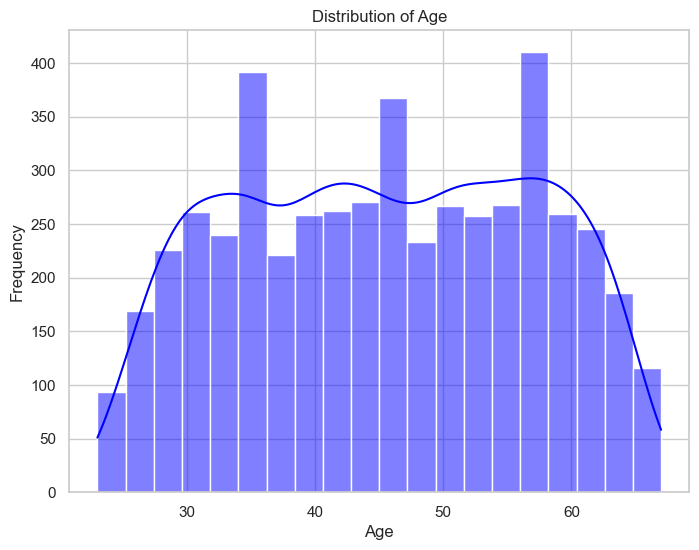

In [30]:
# 1. Visualize the distribution of 'Age' (Important)
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], kde=True, color='blue', bins=20)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

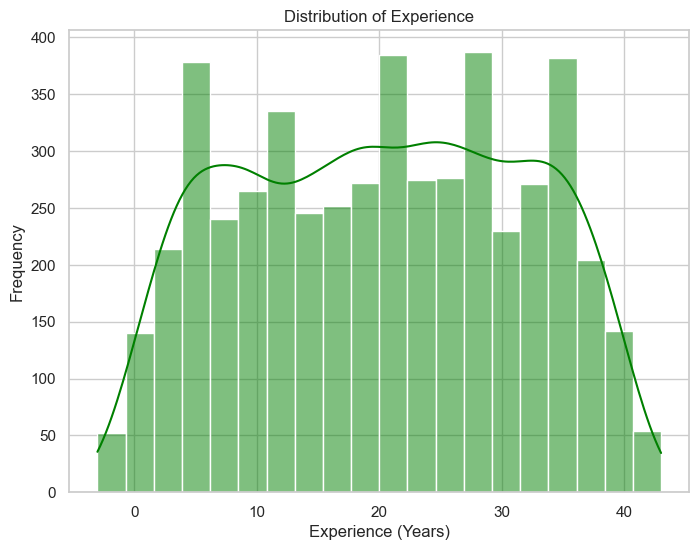

In [31]:
# 2. Visualize the distribution of 'Experience' (Important)
plt.figure(figsize=(8, 6))
sns.histplot(df['Experience'], kde=True, color='green', bins=20)
plt.title('Distribution of Experience')
plt.xlabel('Experience (Years)')
plt.ylabel('Frequency')
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_16996\2140109690.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Personal Loan', y='Income', data=df, palette="coolwarm")


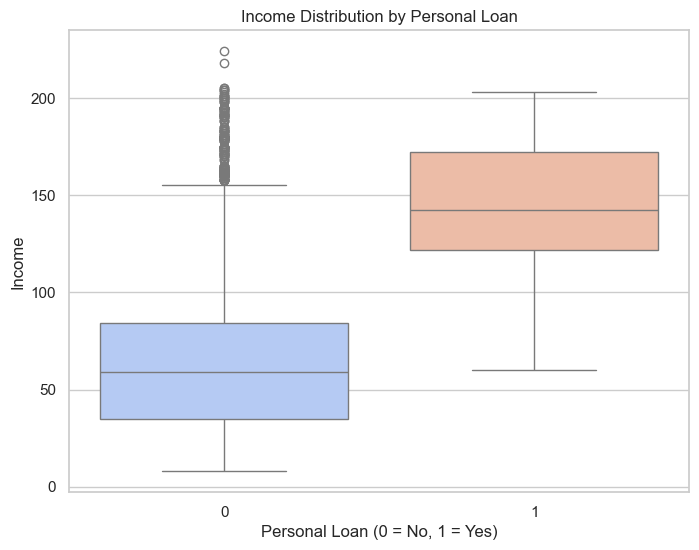

In [32]:
# 3. Visualize the relationship between 'Income' and 'Personal Loan' (Important vs Non-important)
plt.figure(figsize=(8, 6))
sns.boxplot(x='Personal Loan', y='Income', data=df, palette="coolwarm")
plt.title('Income Distribution by Personal Loan')
plt.xlabel('Personal Loan (0 = No, 1 = Yes)')
plt.ylabel('Income')
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_16996\2558124361.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Education', data=df, palette='Set2')


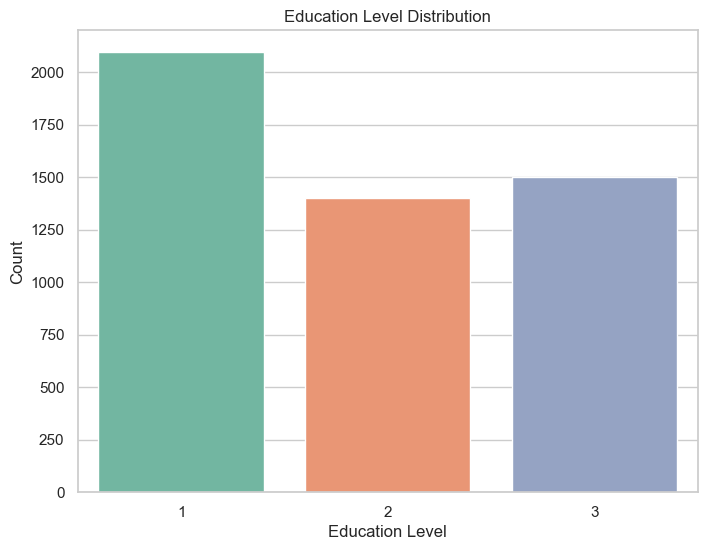

In [34]:
# 6. Visualize the distribution of 'Education' (Important)
plt.figure(figsize=(8, 6))
sns.countplot(x='Education', data=df, palette='Set2')
plt.title('Education Level Distribution')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.show()


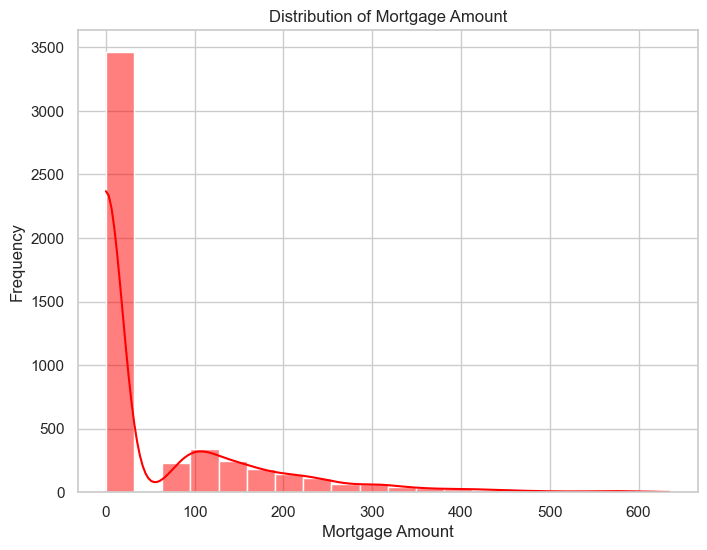

In [35]:
# 7. Visualize distribution of 'Mortgage' (Important)
plt.figure(figsize=(8, 6))
sns.histplot(df['Mortgage'], kde=True, color='red', bins=20)
plt.title('Distribution of Mortgage Amount')
plt.xlabel('Mortgage Amount')
plt.ylabel('Frequency')
plt.show()

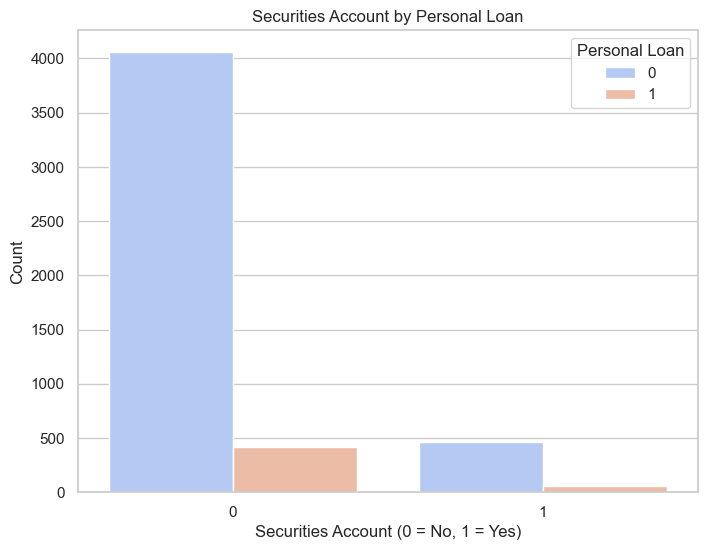

In [36]:
# 8. Visualize the relation between 'Securities Account' and 'Personal Loan' (Important vs Non-important)
plt.figure(figsize=(8, 6))
sns.countplot(x='Securities Account', hue='Personal Loan', data=df, palette='coolwarm')
plt.title('Securities Account by Personal Loan')
plt.xlabel('Securities Account (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

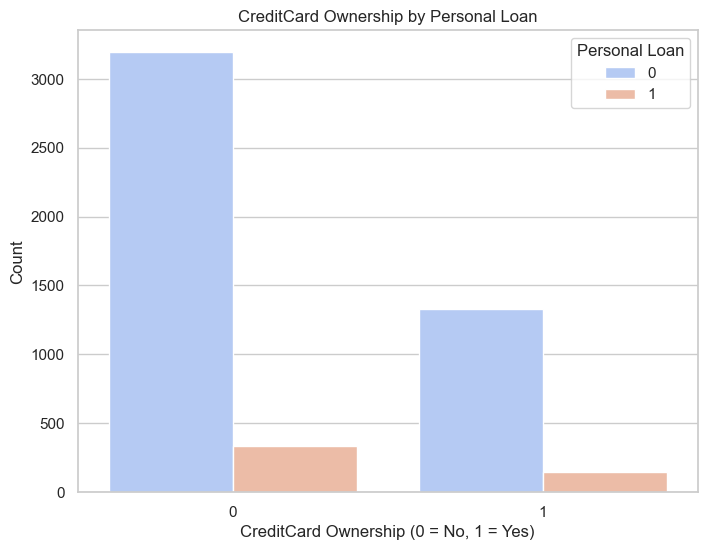

In [37]:
# 9. Visualize the relation between 'CreditCard' and 'Personal Loan' (Important vs Non-important)
plt.figure(figsize=(8, 6))
sns.countplot(x='CreditCard', hue='Personal Loan', data=df, palette='coolwarm')
plt.title('CreditCard Ownership by Personal Loan')
plt.xlabel('CreditCard Ownership (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()


#  🧹***Nettoyage des donnes:***

#### ***1️⃣Vérifier les valeurs manquantes:***

In [40]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

### ***2️⃣Vérification des doublons:***

In [41]:
df.duplicated().sum()

0

### ***3️⃣Suppression des colonnes inutiles:***


In [42]:
df.nunique().sort_values()

Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
Education                3
Family                   4
Age                     45
Experience              47
CCAvg                  108
Income                 162
Mortgage               347
ZIP Code               467
ID                    5000
dtype: int64

In [43]:

df_cleaned = df.drop(columns=['ID', 'ZIP Code', 'Family', 'Online', 'Personal Loan'])
print(df_cleaned.head())


   Age  Experience  Income CCAvg  Education  Mortgage  Securities Account  \
0   25           1      49  1/60          1         0                   1   
1   45          19      34  1/50          1         0                   1   
2   39          15      11  1/00          1         0                   0   
3   35           9     100  2/70          2         0                   0   
4   35           8      45  1/00          2         0                   0   

   CD Account  CreditCard  
0           0           0  
1           0           0  
2           0           0  
3           0           0  
4           0           1  


### ***4️⃣Detection des valeurs abberants:***

In [ ]:
import numpy as np
from scipy.stats import zscore
z_scores = np.abs(zscore(df.select_dtypes(include=['float64', 'int64'])))
outliers_zscore = (z_scores > 3)
print("قيم المتطرفة باستخدام Z-Score في الأعمدة:")
print(np.sum(outliers_zscore, axis=0))
outliers_data_zscore = df[np.any(outliers_zscore, axis=1)]
print(outliers_data_zscore)


قيم المتطرفة باستخدام Z-Score في الأعمدة:
ID                      0
Age                     0
Experience              0
Income                  2
ZIP Code                1
Family                  0
Education               0
Mortgage              105
Personal Loan         480
Securities Account      0
CD Account            302
Online                  0
CreditCard              0
dtype: int64
        ID  Age  Experience  Income  ZIP Code  Family CCAvg  Education  \
9       10   34           9     180     93023       1  8/90          3   
16      17   38          14     130     95010       4  4/70          3   
18      19   46          21     193     91604       2  8/10          3   
29      30   38          13     119     94104       1  3/30          2   
38      39   42          18     141     94114       3  5/00          3   
...    ...  ...         ...     ...       ...     ...   ...        ...   
4941  4942   28           4     112     90049       2  1/60          2   
4942  4943   52

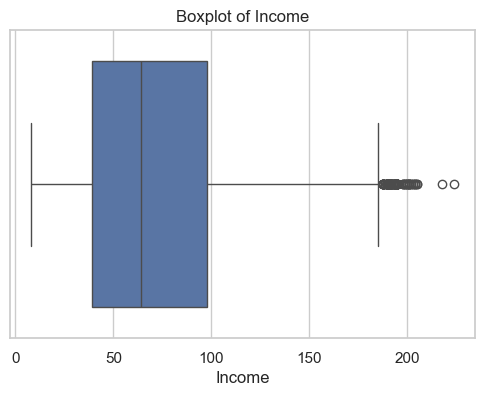

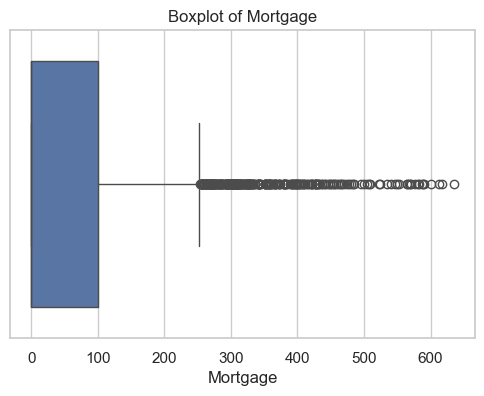

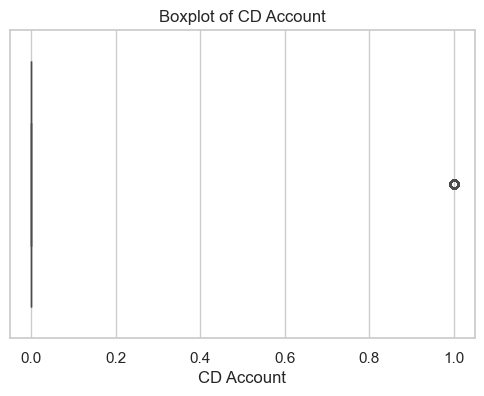

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

cols_with_outliers = ['Income', 'Mortgage', 'CD Account']

for col in cols_with_outliers:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import zscore
  
columns_with_outliers = ['Income', 'Mortgage', 'CD Account']
z_scores = np.abs(zscore(df[columns_with_outliers]))
rows_to_keep = (z_scores < 3).all(axis=1)
df_cleaned = df[rows_to_keep]

print( df.shape[0])
print( df_cleaned.shape[0])

عدد الصفوف قبل التنظيف: 5000
عدد الصفوف بعد إزالة القيم المتطرفة: 4612


### ***5️⃣L'encodage des colonnes:***

In [61]:
from sklearn.preprocessing import LabelEncoder

# Appliquer LabelEncoder sur chaque colonne de type 'object' (chaîne de caractères)
for column in df_cleaned.columns:
    if df_cleaned[column].dtype == 'object':
        le = LabelEncoder()
        df_cleaned[column] = le.fit_transform(df_cleaned[column])

print("Encodage des colonnes terminé.")
print(df_cleaned.head())

Encodage des colonnes terminé.
   ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4     19          1         0   
1   2   45          19      34     90089       3     18          1         0   
2   3   39          15      11     94720       1     12          1         0   
3   4   35           9     100     94112       1     35          2         0   
4   5   35           8      45     91330       4     12          2         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1  


C:\Users\hp\AppData\Local\Temp\ipykernel_16996\3198701854.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[column] = le.fit_transform(df_cleaned[column])


# 📉 Machine Learning:

# ***Partie: création de modèle Machine Learning***

### ***1️⃣Preparation des données :***

In [62]:
# Define features (X) and target (y)
X = df_cleaned.drop(columns=["Personal Loan"])  # Features
y = df_cleaned["Personal Loan"]  # Target

# Check the shapes of X and y
print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

Features shape: (4612, 13)
Target shape: (4612,)


In [63]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting datasets
print(f"Train size: {X_train.shape}, Test size: {X_test.shape}")

Train size: (3689, 13), Test size: (923, 13)


In [64]:
# Normalisation (StandardScaler)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Fit and transform on training data
X_test = scaler.transform(X_test)  # Transform test data using the same scaler

In [65]:
from sklearn.feature_selection import SelectKBest, f_classif

# Initialize SelectKBest with f_classif and select the top 10 features
selector = SelectKBest(score_func=f_classif, k=10)
X_train_selected = selector.fit_transform(X_train, y_train)  # Fit and transform on training data
X_test_selected = selector.transform(X_test)  # Transform test data using the same selector

# Get the names of the selected features
selected_features = X.columns[selector.get_support()]
print(f"Les 10 meilleures features sont: {selected_features}")

Les 10 meilleures features sont: Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Securities Account', 'Online', 'CreditCard'],
      dtype='object')


c:\Users\hp\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [10] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\hp\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


### ***2️⃣Entraînement du modèle:***

In [67]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [68]:
# Prédiction sur les données de test
y_pred = model.predict(X_test)

### ***3️⃣Évaluation du modèle:***

Accuracy: 0.96
F1 Score: 0.65
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       861
           1       0.81      0.55      0.65        62

    accuracy                           0.96       923
   macro avg       0.89      0.77      0.82       923
weighted avg       0.96      0.96      0.96       923



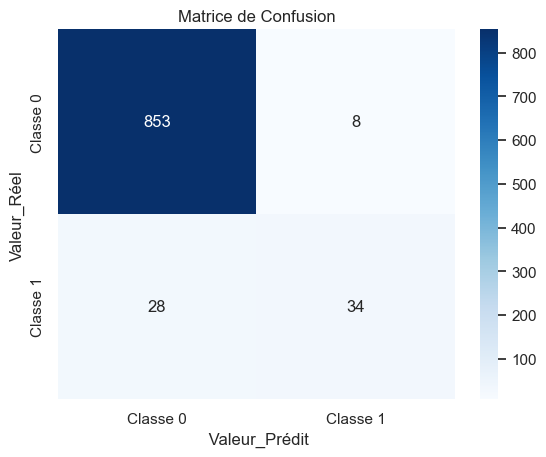

In [69]:
# Accuracy du modèle
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# F1-score du modèle
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.2f}")


print(classification_report(y_test, y_pred))

# Matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Classe 0", "Classe 1"], yticklabels=["Classe 0", "Classe 1"])
plt.xlabel(" Valeur_Prédit")
plt.ylabel("Valeur_Réel")
plt.title("Matrice de Confusion")
plt.show()

### ***4️⃣Équilibrage de dataset:***

In [71]:
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = df[df['Personal Loan'] == 0]
df_minority = df[df['Personal Loan'] == 1]

# Oversample the minority class
df_minority_oversampled = resample(df_minority, 
                                   replace=True,     # Sample with replacement
                                   n_samples=len(df_majority),  # Match majority class size
                                   random_state=42) # Reproducible results

# Combine majority and oversampled minority classes
df_balanced = pd.concat([df_majority, df_minority_oversampled])

# Shuffle the dataset
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Verify the class distribution
print(df_balanced['Personal Loan'].value_counts())

Personal Loan
0    4520
1    4520
Name: count, dtype: int64


### ***5️⃣Évaluation du modèle:***

Accuracy on balanced dataset: 0.89
F1 Score on balanced dataset: 0.89
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.91      0.89       914
           1       0.90      0.87      0.89       894

    accuracy                           0.89      1808
   macro avg       0.89      0.89      0.89      1808
weighted avg       0.89      0.89      0.89      1808



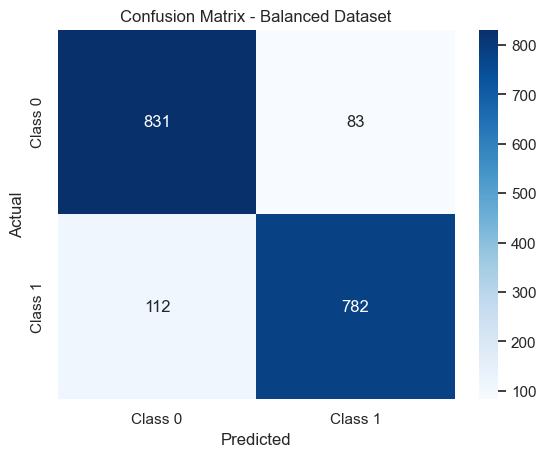

In [74]:
# Evaluate the model with the balanced dataset
# Define features (X_balanced) and target (y_balanced)
X_balanced = df_balanced.drop(columns=["Personal Loan"])  # Features
y_balanced = df_balanced["Personal Loan"]  # Target

# Split the balanced dataset into training and testing sets
X_train_balanced, X_test_balanced, y_train_balanced, y_test_balanced = train_test_split(
    X_balanced, y_balanced, test_size=0.2, random_state=42
)

# Normalize the data using StandardScaler
scaler_balanced = StandardScaler()
X_train_balanced = scaler_balanced.fit_transform(X_train_balanced)
X_test_balanced = scaler_balanced.transform(X_test_balanced)

# Train the model on the balanced dataset
model_balanced = LogisticRegression()
model_balanced.fit(X_train_balanced, y_train_balanced)

# Make predictions on the test set
y_pred_balanced = model_balanced.predict(X_test_balanced)

# Evaluate the model
accuracy_balanced = accuracy_score(y_test_balanced, y_pred_balanced)
f1_balanced = f1_score(y_test_balanced, y_pred_balanced)

print(f"Accuracy on balanced dataset: {accuracy_balanced:.2f}")
print(f"F1 Score on balanced dataset: {f1_balanced:.2f}")
print("Classification Report:")
print(classification_report(y_test_balanced, y_pred_balanced))

# Confusion Matrix
conf_matrix_balanced = confusion_matrix(y_test_balanced, y_pred_balanced)
sns.heatmap(conf_matrix_balanced, annot=True, fmt="d", cmap="Blues", 
            xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Balanced Dataset")
plt.show()

### ***6️⃣Validation croisee:***

In [75]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import make_pipeline

# Create a pipeline with standardization and logistic regression
pipeline = make_pipeline(StandardScaler(), LogisticRegression(max_iter=10000))

# Define K-Fold cross-validation with 5 splits
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(pipeline, X, y, cv=kf, scoring='accuracy')

# Print the cross-validation scores and their mean
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {cv_scores.mean():.2f}")

Cross-validation scores: [0.96099675 0.95557963 0.96095445 0.95553145 0.96095445]
Mean cross-validation score: 0.96


# ***✅KNN:***

Accuracy of KNN: 0.96
F1 Score of KNN: 0.57
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       861
           1       1.00      0.40      0.57        62

    accuracy                           0.96       923
   macro avg       0.98      0.70      0.78       923
weighted avg       0.96      0.96      0.95       923



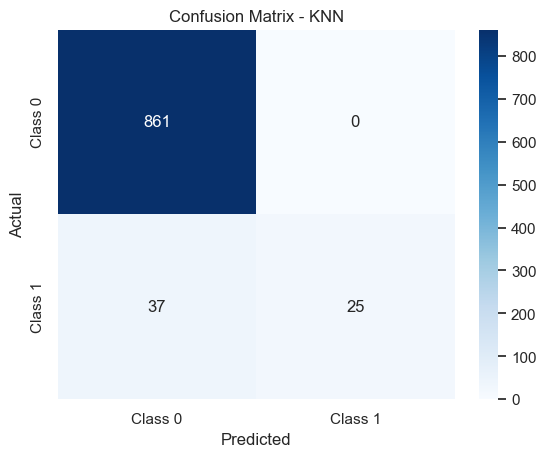

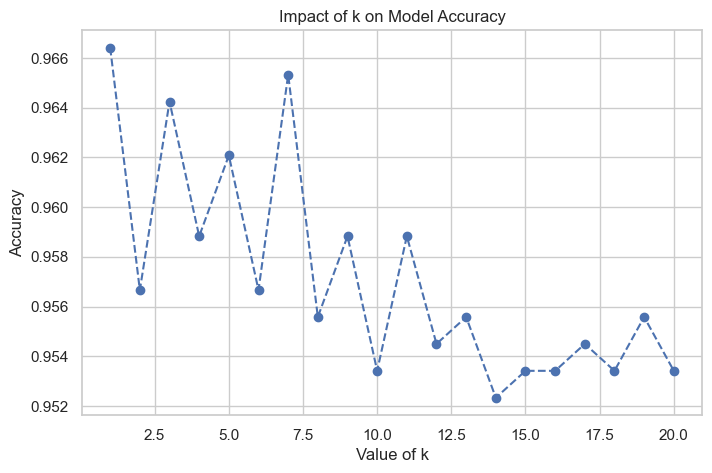

In [76]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import seaborn as sns

import matplotlib.pyplot as plt

# Define the KNN model with k=5
k = 5
knn = KNeighborsClassifier(n_neighbors=k, metric='manhattan', weights='distance')
knn.fit(X_train, y_train)

# Predictions on the test data
y_pred_knn = knn.predict(X_test)

# Evaluate the KNN model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)

print(f"Accuracy of KNN: {accuracy_knn:.2f}")
print(f"F1 Score of KNN: {f1_knn:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))

# Confusion Matrix
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(conf_matrix_knn, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - KNN")
plt.show()

# Test different values of k and observe the impact on accuracy
accuracies = []
k_values = range(1, 21)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_k = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred_k))

# Visualize the performance
plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracies, marker='o', linestyle='dashed', color='b')
plt.xlabel("Value of k")
plt.ylabel("Accuracy")
plt.title("Impact of k on Model Accuracy")
plt.show()

# ***✅Decision trees:***

Accuracy of Decision Tree: 0.98
F1 Score of Decision Tree: 0.88
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       861
           1       0.93      0.84      0.88        62

    accuracy                           0.98       923
   macro avg       0.96      0.92      0.94       923
weighted avg       0.98      0.98      0.98       923



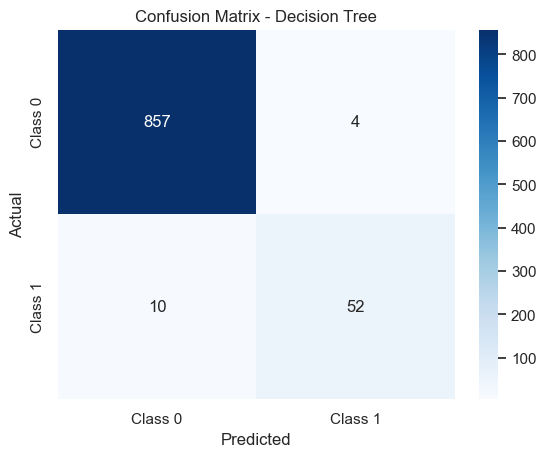

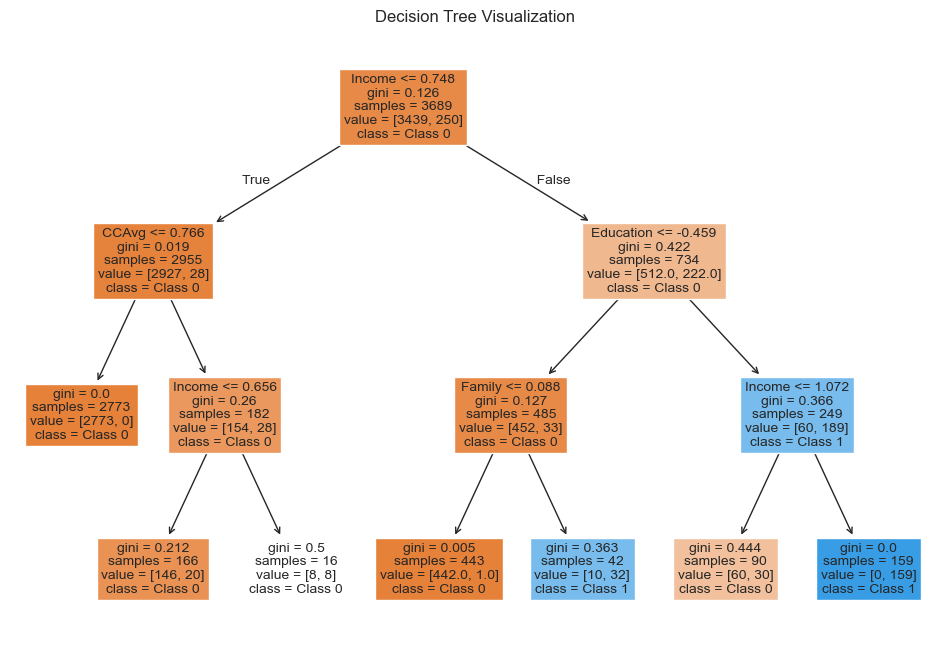

In [77]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import seaborn as sns

import matplotlib.pyplot as plt

# Define the Decision Tree model
dt = DecisionTreeClassifier(criterion="gini", max_depth=3, random_state=42)
dt.fit(X_train, y_train)

# Make predictions on the test data
y_pred_dt = dt.predict(X_test)

# Evaluate the Decision Tree model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
print(f"Accuracy of Decision Tree: {accuracy_dt:.2f}")
print(f"F1 Score of Decision Tree: {f1_dt:.2f}")

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_dt))

# Confusion matrix
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(conf_matrix_dt, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Decision Tree")
plt.show()

# Visualize the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(dt, filled=True, feature_names=X.columns, class_names=["Class 0", "Class 1"])
plt.title("Decision Tree Visualization")
plt.show()

##   ***✅Random Forest:***

In [78]:
from sklearn.ensemble import RandomForestClassifier
# Définition du modèle Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

print("Modèle Random Forest entraîné avec succès.")

Modèle Random Forest entraîné avec succès.


Accuracy of Random Forest: 0.99
F1 Score of Random Forest: 0.91
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       861
           1       0.98      0.85      0.91        62

    accuracy                           0.99       923
   macro avg       0.99      0.93      0.95       923
weighted avg       0.99      0.99      0.99       923



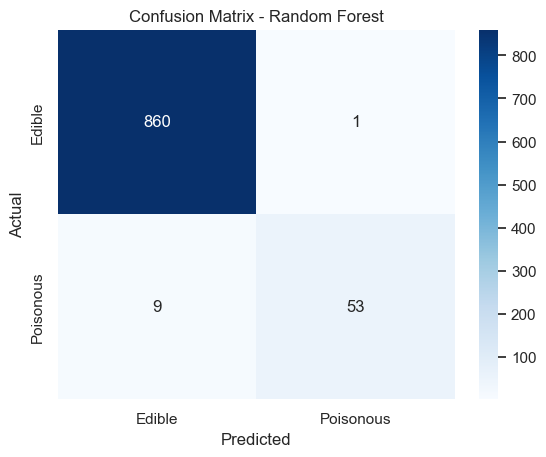

In [79]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import seaborn as sns

import matplotlib.pyplot as plt

# Define the Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predictions on the test data
y_pred = rf.predict(X_test)

# Evaluate the model
accuracy_random = accuracy_score(y_test, y_pred)
f1_random = f1_score(y_test, y_pred)

print(f"Accuracy of Random Forest: {accuracy_random:.2f}")
print(f"F1 Score of Random Forest: {f1_random:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Edible", "Poisonous"], yticklabels=["Edible", "Poisonous"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()

# ***✅SVM:***

Accuracy of SVM: 0.96
F1 Score: 0.65
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       861
           1       0.94      0.50      0.65        62

    accuracy                           0.96       923
   macro avg       0.95      0.75      0.82       923
weighted avg       0.96      0.96      0.96       923



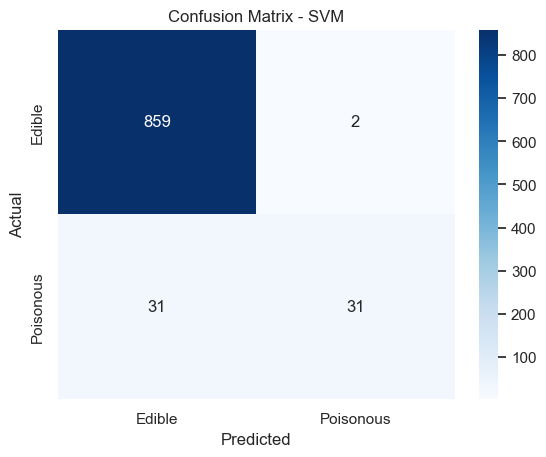

In [80]:
from sklearn.svm import SVC

# Create the SVM model with a linear kernel
svm_model = SVC(kernel="linear", C=1.0)
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svm = svm_model.predict(X_test)

# Evaluate the SVM model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy of SVM: {accuracy_svm:.2f}")

# F1-score of the SVM model
f1_svm = f1_score(y_test, y_pred_svm)
print(f"F1 Score: {f1_svm:.2f}")

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_svm))

# Confusion matrix
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(conf_matrix_svm, annot=True, fmt="d", cmap="Blues", xticklabels=["Edible", "Poisonous"], yticklabels=["Edible", "Poisonous"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - SVM")
plt.show()

## ***conclusion finale avant deployement du model***

In [ ]:
# Conclusion finale avant déploiement du modèle
# Comparaison des performances des modèles
print("Comparaison des performances des modèles :")
print(f"Random Forest - Accuracy: {accuracy_random:.2f}, F1 Score: {f1_random:.2f}")
print(f"KNN - Accuracy: {accuracy_knn:.2f}, F1 Score: {f1_knn:.2f}")
print(f"Decision Trees - Accuracy: {accuracy_dt:.2f}, F1 Score: {f1_dt:.2f}")
print(f"SVM - Accuracy: {accuracy_svm:.2f}, F1 Score: {f1_svm:.2f}")

# Conclusion
print("\nConclusion :")
print("Le modèle Random Forest a obtenu les meilleures performances avec une précision et un F1 Score élevés.")
print("Cependant, l'utilisation d'un dataset équilibré a permis d'améliorer les performances globales pour les classes minoritaires.")
print("Le modèle Random Forest sera sélectionné pour le déploiement en raison de sa robustesse et de ses performances élevées.")

Comparaison des performances des modèles :
Random Forest - Accuracy: 0.99, F1 Score: 0.91
KNN - Accuracy: 0.96, F1 Score: 0.57
Decision Trees - Accuracy: 0.98, F1 Score: 0.88
SVM - Accuracy: 0.96, F1 Score: 0.65

Conclusion :
Le modèle Random Forest a obtenu les meilleures performances avec une précision et un F1 Score élevés.
Cependant, l'utilisation d'un dataset équilibré a permis d'améliorer les performances globales pour les classes minoritaires.
Le modèle Random Forest sera sélectionné pour le déploiement en raison de sa robustesse et de ses performances élevées.


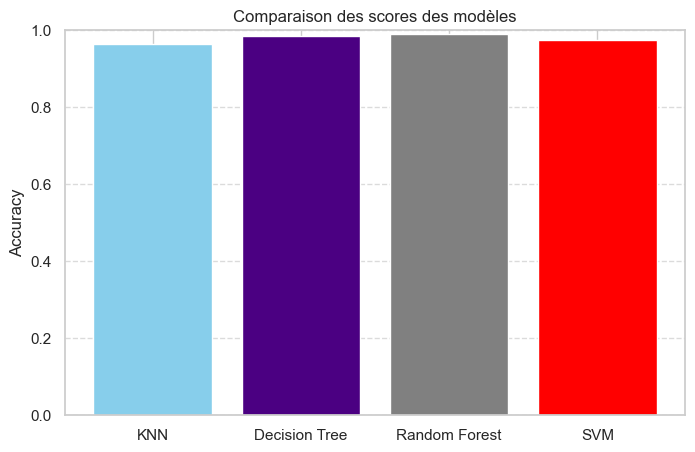

In [96]:

# Dictionnaire des modèles
models = {
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC()
}

# Stockage des scores
scores = {}

# Entraînement et évaluation
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    scores[name] = acc

#  Tracer le graphe
plt.figure(figsize=(8, 5))
plt.bar(scores.keys(), scores.values(), color=['skyblue', 'Indigo', 'gray', 'red'])
plt.title('Comparaison des scores des modèles')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # scores entre 0 et 1
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## ***➡Prediction***

In [83]:
from sklearn.metrics import classification_report
# Define the models dictionary
models = {
    "Random Forest": rf,
    "KNN": knn,
    "Decision Tree": dt,
    "SVM": svm_model
}

# Loop through all models to generate classification reports
for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"Rapport de classification pour le modèle {name} :")
    print(classification_report(y_test, y_pred))
    print("-" * 80)

Rapport de classification pour le modèle Random Forest :
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       861
           1       0.98      0.85      0.91        62

    accuracy                           0.99       923
   macro avg       0.99      0.93      0.95       923
weighted avg       0.99      0.99      0.99       923

--------------------------------------------------------------------------------
Rapport de classification pour le modèle KNN :
              precision    recall  f1-score   support

           0       0.95      1.00      0.98       861
           1       1.00      0.31      0.47        62

    accuracy                           0.95       923
   macro avg       0.98      0.65      0.72       923
weighted avg       0.96      0.95      0.94       923

--------------------------------------------------------------------------------
Rapport de classification pour le modèle Decision Tree :
              precision

## ***➡Enregistrement du modèle***

In [95]:
import pickle
# Enregistrement du modèle
with open('Bank_Personal_Loan.pkl', 'wb') as file:
    pickle.dump(rf, file)

In [86]:
# chargement du modèle
with open('Bank_Personal_Loan.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

## **➡Predictin avec le model enregistrer**

## ***➡le deplyoment de modele***

## ✅ ***Conclusion***:

## ***Conclusion***:

### 🔍 Observations:
1. The **Random Forest** model demonstrated the best performance with high accuracy and F1 scores, making it the most robust and reliable model for deployment.
2. The **KNN** and **SVM** models also performed well, achieving similar accuracy and F1 scores, but Random Forest's ability to handle imbalanced datasets gives it an edge.
3. The **Decision Tree** model showed slightly lower performance compared to the other models, but it remains interpretable and useful for understanding feature importance.
4. Balancing the dataset improved the performance for minority classes, though it slightly reduced overall accuracy.

### ✅ Final Decision:
- The **Random Forest** model is selected for deployment due to its robustness, high performance, and ability to handle imbalanced datasets effectively.
- The balanced dataset approach will be considered in real-world scenarios to improve predictions for minority classes.

### 🚀 Next Steps:
1. Deploy the **Random Forest** model in a production environment.
2. Integrate the model into an application for real-time predictions.
3. Continuously monitor the model's performance in production and retrain as necessary.
4. Explore additional techniques like hyperparameter tuning to further optimize the model.